In [1]:
import torch
from torch import nn 
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'2.1.2+rocm5.6'

# 1. Data (preparing and loading)

In [3]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1) # reshape(50, 1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### X is the input and y is the output, now we can build a model that will predict the formula we just wrote (supposing that we don't know that, and the only information we have are X and y

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10, 7))
    
    plt.scatter(train_data, train_labels, c='b', s=40, label='Training data')
    
    plt.scatter(test_data, test_labels, c='g', s=40, label='Testing data')
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=40, label='Predictions')
    plt.legend(prop={"size": 14})

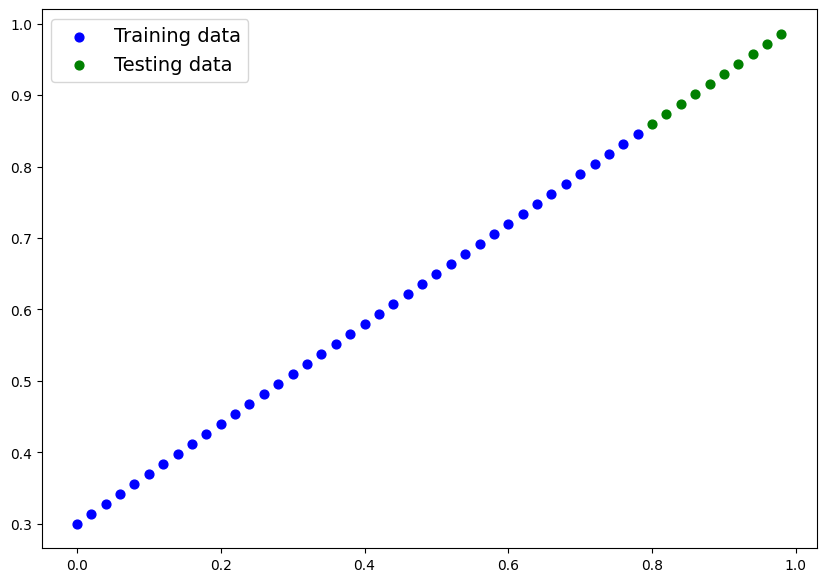

In [6]:
plot_predictions()

# 2. Build model

In [7]:
torch.randn(1)

tensor([-1.5940])

In [8]:
# Create linear regression model class

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float32))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
    

In [9]:
model = LinearRegressionModel()


In [10]:
model.state_dict()

OrderedDict([('weights', tensor([0.7403])), ('bias', tensor([-0.0413]))])

In [11]:
y

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [12]:
with torch.inference_mode():
    # this creates a context on which different things are not tracked.
    y_preds_first = model(X_test)

y_preds_first

tensor([[0.5510],
        [0.5658],
        [0.5806],
        [0.5954],
        [0.6102],
        [0.6250],
        [0.6398],
        [0.6546],
        [0.6694],
        [0.6842]])

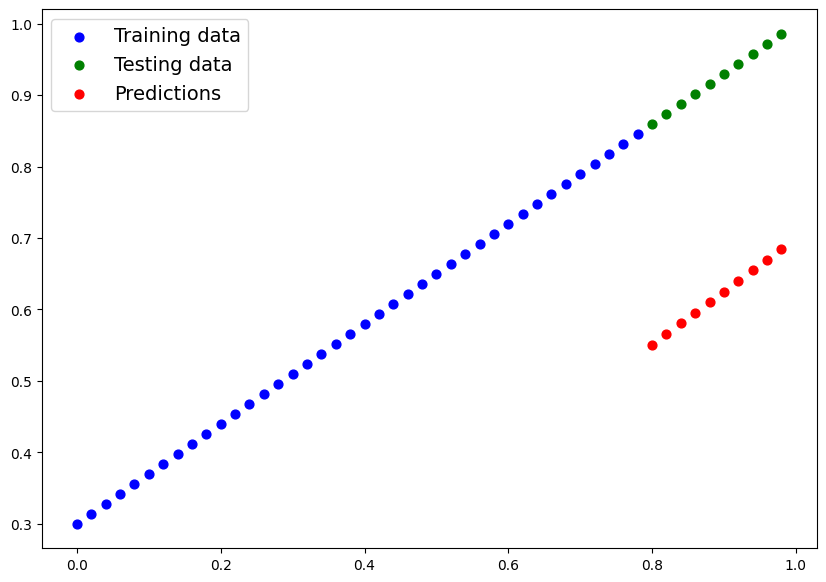

In [13]:
plot_predictions(predictions=y_preds_first)

## Loss functions

In [14]:
list(model.parameters())

[Parameter containing:
 tensor([0.7403], requires_grad=True),
 Parameter containing:
 tensor([-0.0413], requires_grad=True)]

In [15]:
model.state_dict()

OrderedDict([('weights', tensor([0.7403])), ('bias', tensor([-0.0413]))])

In [16]:
torch.square(y_test - y_preds_first).sum()

tensor(0.9327)

In [17]:
torch.mean(torch.abs(y_test - y_preds_first))

tensor(0.3054)

### El optimizador y la función de pérdida los definimos por adelantado

In [18]:
loss_fn = nn.L1Loss()

In [19]:
loss_fn(y_test, y_preds_first)

tensor(0.3054)

In [20]:
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01)

## Training loop

In [21]:
weight, bias

(0.7, 0.3)

In [22]:
epochs = 1000
for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad() # the gradient is accumulative, so we make it 0 before calculation
    loss.backward() # perform backpropagation (compute the gradient of every parameter with requires_grad=True
    optimizer.step()
    
    model.eval()
    
    if epoch % 10 == 0:
        with torch.inference_mode():
            test_pred = model(X_test)
            test_loss = loss_fn(test_pred, y_test)
            
            print(f'Epoch: {epoch}, Loss: {loss:.4f}')
            print(model.state_dict())
        

Epoch: 0, Loss: 0.3255
OrderedDict([('weights', tensor([0.7442])), ('bias', tensor([-0.0313]))])
Epoch: 10, Loss: 0.2103
OrderedDict([('weights', tensor([0.7832])), ('bias', tensor([0.0687]))])
Epoch: 20, Loss: 0.0951
OrderedDict([('weights', tensor([0.8222])), ('bias', tensor([0.1687]))])
Epoch: 30, Loss: 0.0297
OrderedDict([('weights', tensor([0.8377])), ('bias', tensor([0.2337]))])
Epoch: 40, Loss: 0.0252
OrderedDict([('weights', tensor([0.8236])), ('bias', tensor([0.2477]))])
Epoch: 50, Loss: 0.0218
OrderedDict([('weights', tensor([0.8067])), ('bias', tensor([0.2552]))])
Epoch: 60, Loss: 0.0184
OrderedDict([('weights', tensor([0.7895])), ('bias', tensor([0.2622]))])
Epoch: 70, Loss: 0.0149
OrderedDict([('weights', tensor([0.7726])), ('bias', tensor([0.2697]))])
Epoch: 80, Loss: 0.0115
OrderedDict([('weights', tensor([0.7554])), ('bias', tensor([0.2767]))])
Epoch: 90, Loss: 0.0080
OrderedDict([('weights', tensor([0.7383])), ('bias', tensor([0.2837]))])
Epoch: 100, Loss: 0.0046
Order

In [23]:
model.state_dict()

OrderedDict([('weights', tensor([0.7054])), ('bias', tensor([0.2907]))])

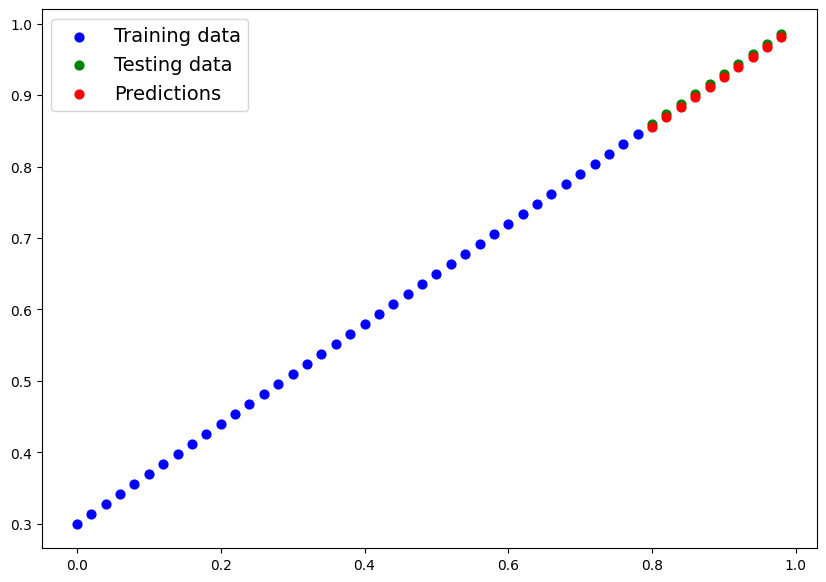

In [24]:
with torch.inference_mode():
    y_preds_new = model(X_test)
    plot_predictions(predictions=y_preds_new)

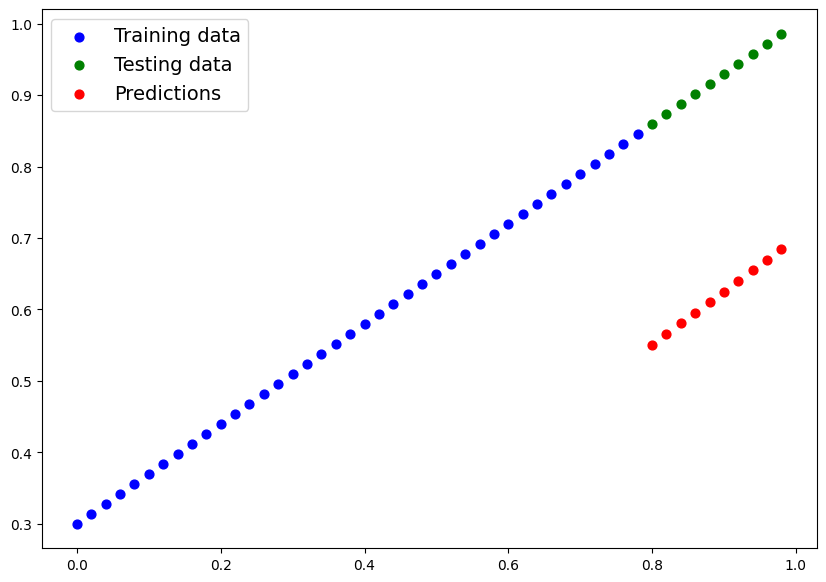

In [25]:
plot_predictions(predictions=y_preds_first)

## Saving the model

### It is recommended to just save and load the state dict

In [27]:
torch.save(model.state_dict(), "./models/model_dict.pth")

In [29]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load("./models/model_dict.pth"))
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.7054])), ('bias', tensor([0.2907]))])

### We can also save and load the entire model

In [31]:
torch.save(model, "./models/full_model.pth")

In [32]:
loaded_full_model = torch.load("./models/full_model.pth")

In [33]:
loaded_full_model.state_dict()

OrderedDict([('weights', tensor([0.7054])), ('bias', tensor([0.2907]))])

In [37]:
loaded_full_model.eval()
with torch.inference_mode():
    loaded_pred = loaded_model(X_test)

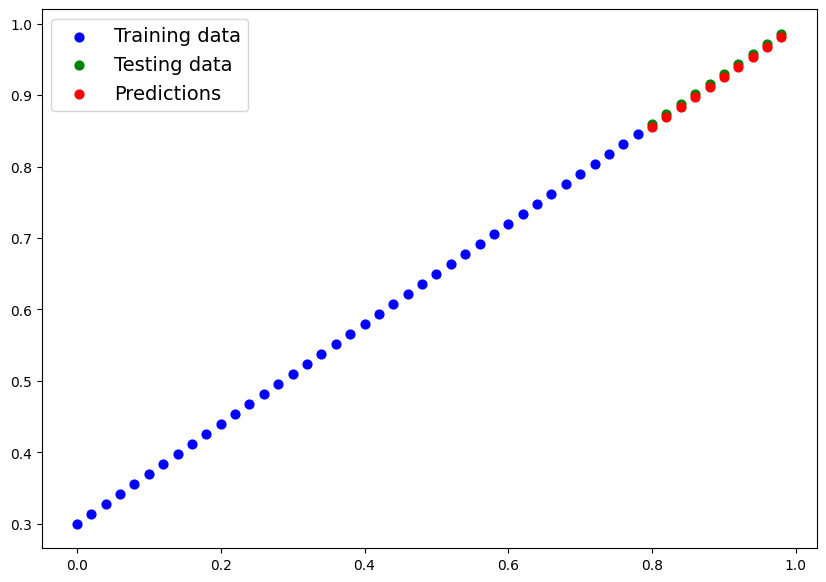

In [38]:
plot_predictions(predictions=loaded_pred)